In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [40]:

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
X = iris.data
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
x = iris_df.iloc[:,:-1].values
y = iris_df.iloc[:,-1].values
from sklearn.preprocessing import LabelEncoder
ly = LabelEncoder()
y = ly.fit_transform(y)

In [43]:
fig_scatter = px.scatter_matrix(iris_df,dimensions=['sepal length (cm)' , 'sepal width (cm)' , 'petal length (cm)' , 'petal width (cm)'])
fig_scatter.update_layout(
    title = "Iris Data Scatter Points",
    width = 900,
    height = 700,
)
fig_scatter.show()

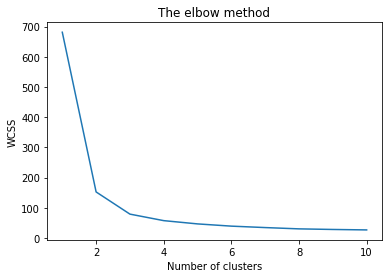

In [44]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0.5, 0.92, 'K Means')

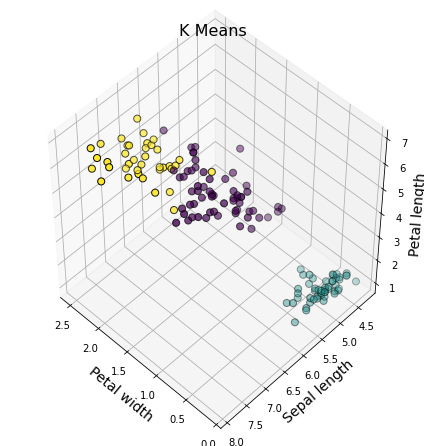

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)
labels = kmeans.labels_

fig = plt.figure(1,figsize=(6,6))
ax = Axes3D(fig,rect = [0,0,0.95,1],elev = 48, azim = 134)
ax.scatter(X[:,3], X[:,0] , X[: ,2],c=labels.astype(np.float),edgecolor = "k" , s=50)
ax.set_xlabel("Petal width" , fontsize = 14)
ax.set_ylabel("Sepal length" , fontsize = 14)
ax.set_zlabel("Petal length" , fontsize = 14)
plt.title("K Means" ,fontsize = 16)

In [46]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

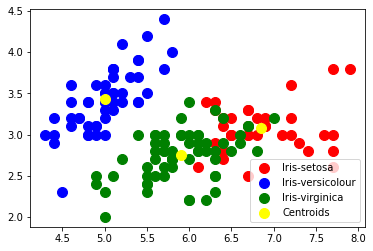

In [47]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()